### Task 2.1
Implement an artificial neuron class, with **sigmoid** activation function. Use matrix operations (from Numpy package). Rememebr to define the activation function derivative. You can use following class-template or implement whole class by yourself.

In [1]:
from typing import Callable,Tuple
import numpy as np


def activation_function(x: float) -> float:
    return 1 / (1 + np.exp(-x))

def activation_function_deriv(x: float) -> float:
    return activation_function(x)*(1-activation_function(x))

class Neuron:
    def __init__(self, input_size: int, act_func: Callable, act_func_deriv: Callable):
        self._init_weights_and_bias(input_size)
        self._activation_function = act_func
        self._activation_function_deriv = act_func_deriv

    def _init_weights_and_bias(self, input_size: int):
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn()

    def __call__(self, x: np.array) -> float:
        return self._forward_propagation(x)

    def _forward_propagation(self, x: np.array) -> float:
        z = np.dot(self.weights, x) + self.bias
        return self._activation_function(z)

    def gradient_descent(self, x: np.array, y_target: float, alpha: float, iterations: int) -> None:
        for _ in range(iterations):
            dW, dB = self._backward_propagation(x, y_target)
            self.weights -= alpha * dW
            self.bias -= alpha * dB

    def _backward_propagation(self, x: np.array, y: float) -> Tuple[np.array, float]:
        output = self._forward_propagation(x)
        error = output - y
        dZ = error * self._activation_function_deriv(np.dot(self.weights, x) + self.bias)
        dW = dZ * x
        dB = dZ
        return dW, dB


## Part 3: Artificial Neuron as binary clasifier
A single neuron used as binary classifier is also known as *perceptron*, frequently used as building block for *dense* layer. It can be used for logistic regression.

### Task 3.1
1) Using your Neuron class construct a following ANN:
  * Input size: 2
  * 1 layer with 1 unit with any activation function
  * Output size: 1

2) Perform separate trainings on provided datasets of truth tables of logic gates. You can experiment with number of iterations (start with n=500) and learnining rate (start with alpha = 0.1)

3) Visualize each dataset and ANN's result (a regression line, as function of two inputs).

4) Comment results

In [2]:
import matplotlib.pyplot as plt

In [3]:
def train_neuron(neuron: Neuron, dataset_x: np.array, dataset_y: np.array, alpha: float, epochs: int) -> None:
    for _ in range(epochs):
        for x, y in zip(dataset_x, dataset_y):
            x = np.array(x)
            neuron.gradient_descent(x, y, alpha, 1)
            
def visualize_results(neuron: Neuron, dataset_x: np.array, dataset_y: np.array, title: str) -> None:
    fig, ax = plt.subplots()
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    zz = np.array([neuron(point) for point in grid_points]).reshape(xx.shape)
    
    # Plot decision boundary (regression line)
    contour = ax.contourf(xx, yy, zz, levels=50, cmap="coolwarm", alpha=0.6)
    
     # Plot the dataset points with labels
    for point, y in zip(dataset_x, dataset_y):
        color = 'red' if y == 1 else 'blue'
        label = 'Output: 1' if y == 1 else 'Output: 0'
        ax.scatter(point[0], point[1], color=color, label=label)
    
    # Prevent duplicate labels in the legend
    handles, labels = ax.get_legend_handles_labels()
    unique_labels = dict(zip(labels, handles))
    ax.legend(unique_labels.values(), unique_labels.keys())

    # Customize plot
    ax.set_title(title)
    ax.set_xlabel("Input 1")
    ax.set_ylabel("Input 2")
    plt.colorbar(contour)
    plt.show()



#### OR gate

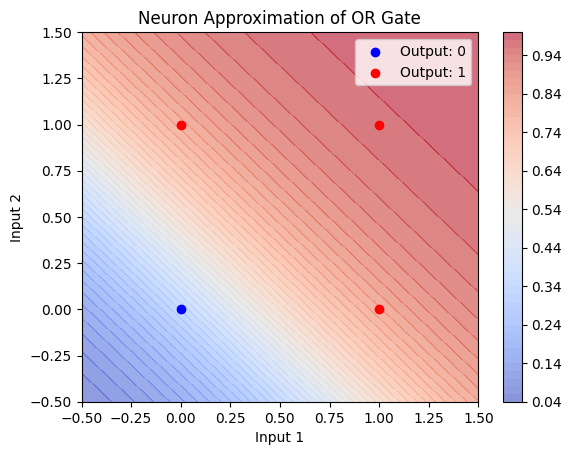

In [4]:
dataset_or_x = ((0,0), (0,1), (1,0), (1,1))
dataset_or_y = (0, 1, 1, 1)

neuron_or = Neuron(input_size=2, act_func=activation_function, act_func_deriv=activation_function_deriv)
train_neuron(neuron_or, dataset_or_x, dataset_or_y, alpha=0.1, epochs=500)

# Visualize results
visualize_results(neuron_or, dataset_or_x, dataset_or_y, "Neuron Approximation of OR Gate")

#### AND gate

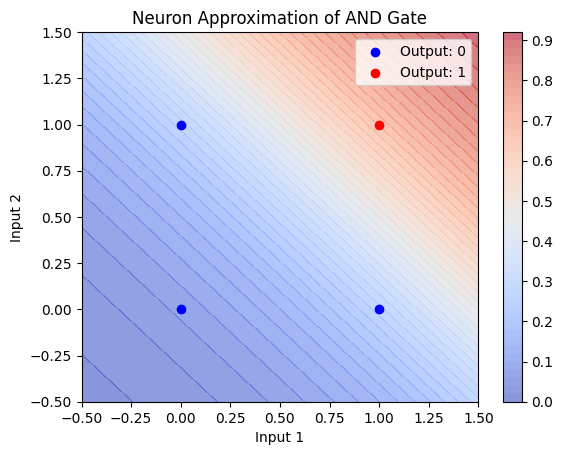

In [5]:
dataset_and_x = ((0,0), (0,1), (1,0), (1,1))
dataset_and_y = (0, 0, 0, 1)

neuron_and = Neuron(input_size=2, act_func=activation_function, act_func_deriv=activation_function_deriv)
train_neuron(neuron_and, dataset_and_x, dataset_and_y, alpha=0.1, epochs=500)

visualize_results(neuron_and, dataset_and_x, dataset_and_y, "Neuron Approximation of AND Gate")

#### XOR gate

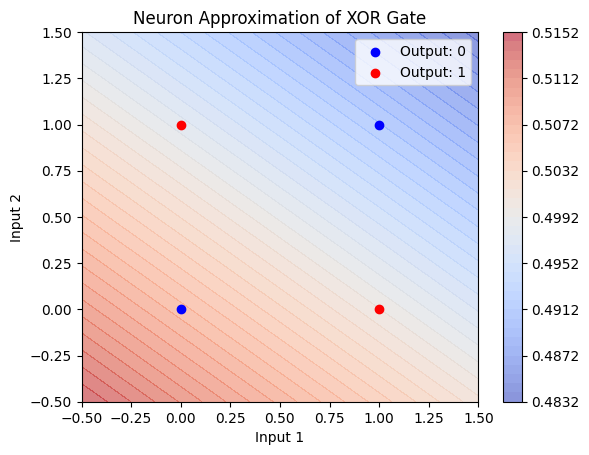

In [6]:
dataset_xor_x = ((0,0), (0,1), (1,0), (1,1))
dataset_xor_y = (0, 1, 1, 0)

neuron_xor = Neuron(input_size=2, act_func=activation_function, act_func_deriv=activation_function_deriv)
train_neuron(neuron_xor, dataset_xor_x, dataset_xor_y, alpha=0.1, epochs=500)

visualize_results(neuron_xor, dataset_xor_x, dataset_xor_y, "Neuron Approximation of XOR Gate")

For OR and AND gates the neuron works well since the classes are linearly separable, however for XOR it fails

## Part 4: Multilayer perceptron
More neurons can be stacked together to model nonlinear properties.  

### Task 4.1
In this task you have to implement following ANN:
* Input size: 2
* 1 layer with 2 units with sigmoid activation function
* 1 layer with 1 unit with sigmoid activation function
* Output size: 1
    
Your Neuron class was not designed for ambitious merging of weights and biases during the gradient descent, nor for passing outputs to perform forward propagation. To overcome such inconvenience, please manualy define dataflow and method calling for all Neurons. You can expand provided example.

In [7]:
class NeuralNetwork():
    def __init__(self, input_size: int, act_func: Callable, act_func_deriv: Callable):
        self._neuron_1 = Neuron(input_size, act_func, act_func_deriv)
        self._neuron_2 = Neuron(input_size, act_func, act_func_deriv)
        self._neuron_3 = Neuron(2, act_func, act_func_deriv)
        
    def __call__(self, x: np.array) -> float:
        return self._network_forward_propagation(x)

    def _network_forward_propagation(self, x: np.array) -> float:
        input_3_1 = self._neuron_1(x)
        input_3_2 = self._neuron_2(x)
        input_3 = np.array([input_3_1, input_3_2])
        return self._neuron_3(input_3)

    def _network_backwards_propagation(self, x: np.array, y: float) -> Tuple[np.array, float, float]:
        # Forward pass
        output = self._network_forward_propagation(x)
        
        # Compute the error
        error = output - y
        
        # Backpropagation
        dZ3 = error * self._neuron_3._activation_function_deriv(np.dot(self._neuron_3.weights, np.array([self._neuron_1(x), self._neuron_2(x)])) + self._neuron_3.bias)
        dW3 = dZ3 * np.array([self._neuron_1(x), self._neuron_2(x)])
        dB3 = dZ3
        
        # Compute gradients for neuron 2
        dZ2 = dZ3 * self._neuron_3.weights[1] * self._neuron_2._activation_function_deriv(np.dot(self._neuron_2.weights, x) + self._neuron_2.bias)
        dW2 = dZ2 * x
        dB2 = dZ2
        
        # Compute gradients for neuron 1
        dZ1 = dZ3 * self._neuron_3.weights[0] * self._neuron_1._activation_function_deriv(np.dot(self._neuron_1.weights, x) + self._neuron_1.bias)
        dW1 = dZ1 * x
        dB1 = dZ1

        return dW1, dB1, dW2, dB2, dW3, dB3

    def gradient_descent(self, x: np.array, y: float, alpha: float) -> None:
        dW1, dB1, dW2, dB2, dW3, dB3 = self._network_backwards_propagation(x, y)
        
        # Update weights and biases for each neuron
        self._neuron_1.weights -= alpha * dW1
        self._neuron_1.bias -= alpha * dB1
        
        self._neuron_2.weights -= alpha * dW2
        self._neuron_2.bias -= alpha * dB2
        
        self._neuron_3.weights -= alpha * dW3
        self._neuron_3.bias -= alpha * dB3
        
def train_network(network: NeuralNetwork, dataset_x: np.array, dataset_y: np.array, alpha: float, epochs: int) -> None:
    for _ in range(epochs):
        for x, y in zip(dataset_x, dataset_y):
            network.gradient_descent(np.array(x), y, alpha)

### Task 4.2
1) Train your ANN created in task 4.1 on the XOR dataset. You can experiment with number of iterations (start with n=500) and learning rate (start with alpha=0.1).

2) Visualize the dataset and ANN's result (a regression line, as function of two inputs).

3) Comment results.

In [8]:
def visualize_results_net(neuralnet: NeuralNetwork, dataset_x: np.array, dataset_y: np.array, title: str) -> None:
    fig, ax = plt.subplots()
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    zz = np.array([neuralnet(point) for point in grid_points]).reshape(xx.shape)
    
    # Plot decision boundary (regression line)
    contour = ax.contourf(xx, yy, zz, levels=50, cmap="coolwarm", alpha=0.6)
    
     # Plot the dataset points with labels
    for point, y in zip(dataset_x, dataset_y):
        color = 'red' if y == 1 else 'blue'
        label = 'Output: 1' if y == 1 else 'Output: 0'
        ax.scatter(point[0], point[1], color=color, label=label)
    
    # Prevent duplicate labels in the legend
    handles, labels = ax.get_legend_handles_labels()
    unique_labels = dict(zip(labels, handles))
    ax.legend(unique_labels.values(), unique_labels.keys())

    # Customize plot
    ax.set_title(title)
    ax.set_xlabel("Input 1")
    ax.set_ylabel("Input 2")
    plt.colorbar(contour)
    plt.show()

Input: (0, 0), Predicted Output: 0.1035, Rounded: 0
Input: (0, 1), Predicted Output: 0.8803, Rounded: 1
Input: (1, 0), Predicted Output: 0.8797, Rounded: 1
Input: (1, 1), Predicted Output: 0.1548, Rounded: 0


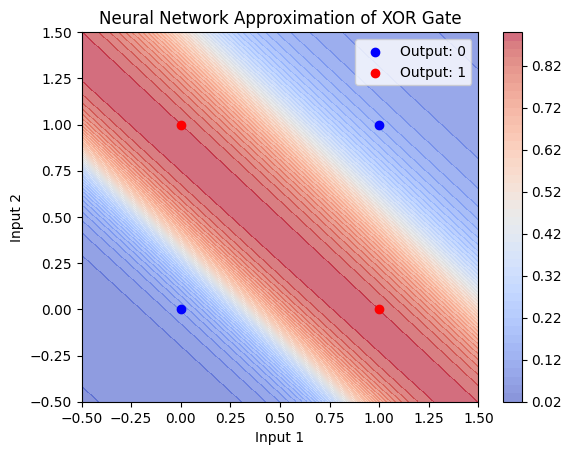

In [10]:
dataset_xor_x = ((0,0), (0,1), (1,0), (1,1))
dataset_xor_y = (0, 1, 1, 0)

input_size = 2
neural_network = NeuralNetwork(input_size, activation_function, activation_function_deriv)

# Train the network
alpha = 0.1
epochs = 5000  # Increase epochs for better learning
for _ in range(epochs):
    for x, y in zip(dataset_xor_x, dataset_xor_y):
        neural_network.gradient_descent(np.array(x), y, alpha)

# Test the network after training
for x in dataset_xor_x:
    prediction = neural_network(np.array(x))
    print(f"Input: {x}, Predicted Output: {prediction:.4f}, Rounded: {round(prediction)}")

visualize_results(neural_network, dataset_xor_x, dataset_xor_y, "Neural Network Approximation of XOR Gate")

This time the net worked much better